<a href="https://colab.research.google.com/github/alexkumar-nuub/cnn-model-from-scratch-coded-not-copied-/blob/main/Transfer_Learning_Inception_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/new augmented data alex/new assamese augmented data of 6 class'
valid_path = '/content/drive/MyDrive/DATASET/Data set/test'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87924736/87910968 [==============================] - 0s 0us/step


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/new augmented data alex/new assamese augmented data of 6 class/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/new augmented data alex/new assamese augmented data of 6 class',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4352 images belonging to 6 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/DATASET/Data set/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 41 images belonging to 6 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
136/136 [==============================] - 602s 4s/step - loss: 0.6701 - accuracy: 0.9331 - val_loss: 2.1000 - val_accuracy: 0.7805
Epoch 2/10
136/136 [==============================] - 90s 661ms/step - loss: 0.0523 - accuracy: 0.9892 - val_loss: 2.5440 - val_accuracy: 0.8049
Epoch 3/10
136/136 [==============================] - 91s 669ms/step - loss: 0.0554 - accuracy: 0.9901 - val_loss: 6.0072 - val_accuracy: 0.7073
Epoch 4/10
136/136 [==============================] - 90s 662ms/step - loss: 0.0922 - accuracy: 0.9867 - val_loss: 9.0290 - val_accuracy: 0.6829
Epoch 5/10
136/136 [==============================] - 91s 666ms/step - loss: 0.0900 - accuracy: 0.9903 - val_loss: 2.0509 - val_accuracy: 0.9268
Epoch 6/10
136/136 [==============================] - 91s 669ms/step - loss: 0.0546 - accuracy: 0.9938 - val_loss: 5.3027 - val_accuracy: 0.8293
Epoch 7/10
136/136 [==============================] - 91s 667ms/step - loss: 0.0641 - accuracy: 0.9929 - val_loss: 2.6498 - val_accu

In [17]:
import matplotlib.pyplot as plt

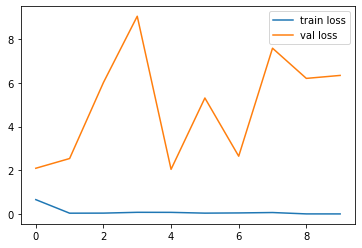

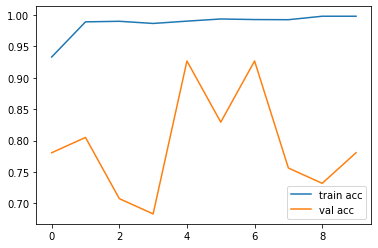

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [38]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [20]:

y_pred = model.predict(test_set)


In [21]:
y_pred

array([[3.36699810e-19, 5.68465067e-12, 1.33701514e-15, 1.00000000e+00,
        9.46136347e-35, 7.23975471e-38],
       [1.00000000e+00, 1.28639860e-37, 0.00000000e+00, 8.01802364e-22,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.04619727e-23, 1.27629184e-35, 8.46482149e-35,
        1.00000000e+00, 0.00000000e+00],
       [3.28452354e-09, 1.00000000e+00, 4.55477028e-21, 9.01423862e-25,
        0.00000000e+00, 8.03552436e-33],
       [1.00000000e+00, 3.29745286e-36, 7.63364737e-38, 4.37153357e-28,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.15695681e-24, 1.77993435e-37, 3.84321460e-31,
        0.00000000e+00, 1.24509520e-29],
       [5.96083715e-35, 1.00000000e+00, 0.00000000e+00, 1.00732492e-10,
        3.22856429e-33, 0.00000000e+00],
       [0.00000000e+00, 2.00321534e-19, 1.00000000e+00, 2.39013071e-25,
        2.97005602e-38, 1.12037081e-36],
       [1.53910675e-22, 3.88073159e-34, 0.00000000e+00, 9.92289442e-32,
        1.17580193e-35, 

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([3, 0, 4, 1, 0, 0, 1, 2, 5, 4, 1, 1, 0, 0, 0, 5, 4, 0, 0, 5, 5, 4,
       0, 5, 5, 0, 2, 2, 1, 1, 5, 5, 0, 5, 0, 0, 2, 5, 1, 5, 1])

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
model=load_model('model_resnet50.h5')

OSError: ignored

In [27]:
img_data

NameError: ignored

In [28]:
img=image.load_img('/content/drive/MyDrive/DATASET/Data set/test/Ban Bati assam/Ban Bati assam_0196845366.jpg',target_size=(224,224))



In [29]:
x=image.img_to_array(img)
x

array([[[26., 19., 13.],
        [26., 19., 13.],
        [26., 19., 13.],
        ...,
        [14.,  9.,  6.],
        [14.,  9.,  6.],
        [15., 10.,  7.]],

       [[26., 19., 13.],
        [26., 19., 13.],
        [26., 19., 13.],
        ...,
        [14.,  9.,  6.],
        [14.,  9.,  6.],
        [15., 10.,  7.]],

       [[26., 19., 13.],
        [26., 19., 13.],
        [26., 19., 13.],
        ...,
        [14.,  9.,  6.],
        [14.,  9.,  6.],
        [15., 10.,  7.]],

       ...,

       [[38., 29., 22.],
        [45., 36., 29.],
        [46., 37., 30.],
        ...,
        [48., 35., 26.],
        [44., 31., 22.],
        [39., 26., 17.]],

       [[39., 30., 23.],
        [38., 29., 22.],
        [41., 32., 25.],
        ...,
        [65., 51., 42.],
        [61., 47., 38.],
        [53., 39., 30.]],

       [[38., 29., 22.],
        [40., 31., 24.],
        [40., 31., 24.],
        ...,
        [67., 53., 42.],
        [63., 49., 38.],
        [56., 42., 31.]]

In [30]:
x.shape

(224, 224, 3)

In [31]:
x=x/255

In [32]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [33]:
model.predict(img_data)

array([[4.8033212e-07, 3.1368569e-03, 2.5756476e-06, 9.9330306e-01,
        3.4855140e-11, 3.5570390e-03]], dtype=float32)

In [34]:
a=np.argmax(model.predict(img_data), axis=1)

In [35]:
a==1

array([False])

In [36]:
import tensorflow as tf

In [37]:
tf.__version__

'2.8.2'